В моем распоряжении данные развлекательного приложения Procrastinate Pro+, который, несмотря на огромные вложения в рекламу, никак не может выйти в плюс. Моей основной **целью** является выделить причины неэффективности привлечения пользователей и сформулировать рекомендации для отдела маркетинга.

Для достижения цели были поставлены следующие задачи:

1. Проанализировать профили пользователей приложения, изучить предпочтения в устройствах платящих пользователей, их географию и выделить основные источники привлечения платящих пользователей.

2. Провести оценку расходов на маркетинг, а именно проанализировать траты на рекламные платформы, в том числе во времени.Рассчитать среднюю стоимость привлечения пользователя из каждого источника.

3. Провести анализ конверсии и удержания пользователей.

4. Проанализировать окупаемость рекламы с помощью стандартных метрик юнит-экономики (LTV, CAC и ROI), в том числе с разбивкой по устройствам, странам и рекламным каналам

5. Собрать данные для рекомендации маркетологам.


Поскольку ранее с этими данными работать не приходилось нужно будет произвести предобработку данных перед исследованием: посмотреть какие типы данных содержатся в столбцах, преобразовать при необходимости, определить есть ли пропуски в данных, и если есть то попытаться заменить их на что-то осмысленное. Также нужно посмотреть дубликаты, редкие или аномальные выбивающиеся значения, понять стоит ли от них избавляться.

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

#### Загрузка и знакомство

In [1]:
# загрузка библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    expenses = pd.read_csv('/datasets/costs_info_short.csv')
except FileNotFoundError as e:
    print(f"Ошибка: {e}. Пожалуйста, проверьте путь к файлу.")

Чтобы не обращаться к каждому набору данных по отдельности, создадим лист и будем обращаться к листу.

In [4]:
df_list = [visits,orders,expenses]

In [5]:
for i in df_list:
    display(i.head(10))
    print("\n")

User Id         Region   Device         Channel        Session Start  \
0  981449118918  United States   iPhone         organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone         organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac         organic  2019-05-01 14:09:25   
3  326433527971  United States  Android          TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac         organic  2019-05-01 03:33:35   
5   90242400005  United States   iPhone  RocketSuperAds  2019-05-01 07:14:52   
6   43958116050  United States  Android         organic  2019-05-01 09:03:21   
7  185365244969  United States   iPhone         organic  2019-05-01 09:37:03   
8  446013509831  United States   iPhone  RocketSuperAds  2019-05-01 10:26:00   
9  100970711362  United States      Mac          TipTop  2019-05-01 04:39:53   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40  
5  2019-05-01 08:19:56  
6  2019-05-01 10:08:39  
7  2019-05-01 10:00:43  
8  2019-05-01 10:59:17  
9  2019-05-01 04:57:05

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99
5  129100331057  2019-05-01 01:56:28     4.99
6  626807144131  2019-05-01 02:39:21     4.99
7  914062168985  2019-05-01 02:02:18     4.99
8  769669137453  2019-05-01 03:39:47     4.99
9  434198630691  2019-05-01 18:16:50     5.99

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1
5  2019-05-06  FaceBoom  118.8
6  2019-05-07  FaceBoom  101.2
7  2019-05-08  FaceBoom  100.1
8  2019-05-09  FaceBoom   93.5
9  2019-05-10  FaceBoom  104.5

Видим, что названия колонок в верхнем и нижнем регистре и содержат пробелы, нужно будет привести в сооствествие с хорошим стилем.

In [6]:
for i in df_list:
    i.info()
    print("\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Colum

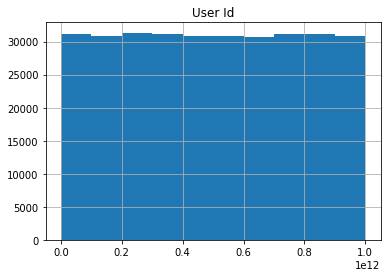

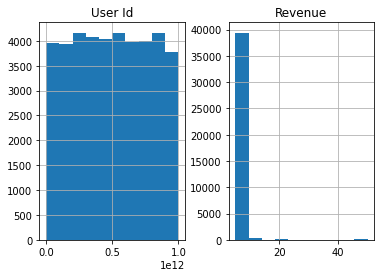

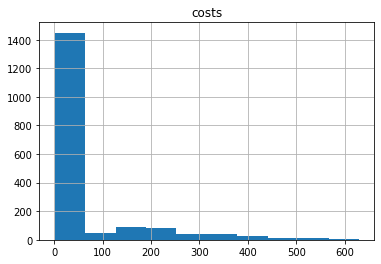

In [7]:
# построим гистограммы
for i in df_list:
    print()
    i.hist()
    print('\n')

In [8]:
# проверка пустых значений в циле в списке с датасетами
for i in df_list:
    print(i.isnull().sum())
    print('\n')

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64


User Id     0
Event Dt    0
Revenue     0
dtype: int64


dt         0
Channel    0
costs      0
dtype: int64




Пустых значений нет, это радует. Посмотрим на некоторые столбцы более внимательно.

In [9]:
# Уникальные значения в столбце Region
print('Уникальные значения в Region в visits:', visits['Region'].unique())

# Уникальные значения в столбце Device
print('Уникальные значения в Device в visits:', visits['Device'].unique())

# Уникальные значения в столбце Channel из таблицы с визитами
print('Уникальные значения в Channel visits :', 
      sorted(visits['Channel'].unique()))

# Уникальные значения в столбце Channel из таблицы с тратами на рекламу
print('Уникальные значения в Channel expenses :',
      sorted(expenses['Channel'].unique()))

Уникальные значения в Region в visits: ['United States' 'UK' 'France' 'Germany']
Уникальные значения в Device в visits: ['iPhone' 'Mac' 'Android' 'PC']
Уникальные значения в Channel visits : ['AdNonSense', 'FaceBoom', 'LeapBob', 'MediaTornado', 'OppleCreativeMedia', 'RocketSuperAds', 'TipTop', 'WahooNetBanner', 'YRabbit', 'lambdaMediaAds', 'organic']
Уникальные значения в Channel expenses : ['AdNonSense', 'FaceBoom', 'LeapBob', 'MediaTornado', 'OppleCreativeMedia', 'RocketSuperAds', 'TipTop', 'WahooNetBanner', 'YRabbit', 'lambdaMediaAds']


У нас данные из четырех стран: США, Великобритания, Франция, Германия. Пользователи 4 категорий устройств:iPhone, Mac, Android, PC. Есть 10 каналов привлечения пользователей. Каналы совпадают в таблице визитов и трат на рекламу, кроме источника 'organic', оно и понятно, они приходят сами, поэтому на рекламу тратиться не пришлось.

Проверим полые дубликаты (полное совпадение во всех столбцах)

In [10]:
duplicates = visits[visits.duplicated()]
print('Количество полных дубликатов в visits:', duplicates.shape[0])

Количество полных дубликатов в visits: 0


In [11]:
duplicates = orders[orders.duplicated()]
print('Количество полных дубликатов в orders:', duplicates.shape[0])

Количество полных дубликатов в orders: 0


In [12]:
duplicates = expenses[expenses.duplicated()]
print('Количество полных дубликатов в expenses:', duplicates.shape[0])

Количество полных дубликатов в expenses: 0


Полные дубликаты отсутствуют.

#### Предобработка

Начнем с переименования столбцов, чтобы в дальнейшем было проще обращаться к ним

In [13]:
# новые названия столбцов

visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']
orders.columns = ['user_id', 'event_dt', 'revenue']
expenses.columns = ['dt', 'channel', 'costs']

In [14]:
# посмотрим на данные чтобы проверить, что названия изменились

for i in df_list:
    i.info()
    print("\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Colum

Теперь сменим типа данных на datetime

In [15]:
# смена типа данных в столбцах со временем на datetime

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
expenses['dt'] = pd.to_datetime(expenses['dt']).dt.date

In [16]:
# проверка типов после измения

for i in df_list:
    i.info()
    print("\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 94

In [17]:
# найдем самое раннюю и самую позднюю дату в таблице orders
min_date = orders['event_dt'].min()
max_date = orders['event_dt'].max()

# Вывод информации о периоде данных
print("покупки за период данных с", min_date, "по ", max_date)

покупки за период данных с 2019-05-01 00:28:11 по  2019-10-31 23:56:56


In [18]:
# найдем самое раннюю и самую позднюю дату в таблице visits
min_date = visits['session_start'].min()
max_date = visits['session_start'].max()
print("посещение за период данных с", min_date, "по ", max_date)

посещение за период данных с 2019-05-01 00:00:41 по  2019-10-31 23:59:23


In [19]:
# найдем самое раннюю и самую позднюю дату в таблице expenses
min_date = expenses['dt'].min()
max_date = expenses['dt'].max()
print("рекламные компании за период данных с", min_date, "по ", max_date)

рекламные компании за период данных с 2019-05-01 по  2019-10-27


### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

Объявление функций get_profiles() — для создания профилей пользователей, в одной два аргумента на вход, в другой 4

In [20]:
# функция с двумя аргументами
def get_profiles2(sessions, orders):

    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    
    # проверьте, есть ли ID пользователей из profiles в orders
    profiles['payer'] =  profiles['user_id'].isin(orders['user_id'].unique())

    return profiles


In [21]:
# функция для создания пользовательских профилей с 4 аргументами

def get_profiles4(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


Объявление функции get_retention() — для подсчёта Retention Rate

In [22]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

Объявление функции get_conversion() — для подсчёта конверсии

In [23]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

Объявление функции get_ltv() — для подсчёта LTV и ROI

In [24]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

Объявление функции filter_data() — для сглаживания данных

In [25]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

Объявление функции plot_retention() — для построения графика Retention Rate

In [26]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

Объявление функции plot_conversion() — для построения графика конверсии

In [27]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Объявление функции plot_ltv_roi — для визуализации LTV и ROI

In [28]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Составление профилей

In [29]:
# для создания профилей используем функцию с двумя аргументами
profiles = get_profiles2(visits, orders)
display(profiles.head(5)) 

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  
0  2019-05-07 2019-05-01   True  
1  2019-07-09 2019-07-01  False  
2  2019-10-01 2019-10-01  False  
3  2019-08-22 2019-08-01  False  
4  2019-10-02 2019-10-01  False

In [30]:
# находим максимальную и минимальную дату привлечения пользователей
min_date = profiles['first_ts'].min()
max_date = profiles['first_ts'].max()
print("Минимальная дата привлечения пользователей:", min_date)
print("максимальная: ", max_date)

Минимальная дата привлечения пользователей: 2019-05-01 00:00:41
максимальная:  2019-10-27 23:59:04


Мы можем ипользовать когорты пользователей привлеченных с 1 мая по 27 октября 2019 года. По условиям у нас горизонт анализа две недели, а на данный момент 1 ноября 2019 года. Значит можем взять для рассмотрения данные для когорт привлеченных с 1 мая по 18 октября 2019 года.

#### Распределение по странам

In [31]:
# функция для построения таблиц
def aggregate_by_column(df, group_column):
    result = df.groupby(group_column).agg(
        payer_mean=('payer', 'mean'),
        user_count=('user_id', 'nunique')
    ).reset_index()
    result = (
        result.sort_values(by=['payer_mean', 'user_count'],
                           ascending=[False, False])
    )
    
    return result

In [32]:
# строим сводную таблицу
# result = profiles.groupby('region').agg(
#     payer_mean=('payer', 'mean'),
#     user_count=('user_id', 'nunique')
# ).reset_index()


result = aggregate_by_column(profiles, 'region')

# сортировка 

display(result)

region  payer_mean  user_count
3  United States    0.069019      100002
1        Germany    0.041119       14981
2             UK    0.039829       17575
0         France    0.037994       17450

Мы видим, что больше всего пользователей из США, их чуть больше 100 тыс человек, в то время как в других странах всего 14-17 тыс. пользователей. Тоже характерно и для распределения покупателей по странам. Больше всего процент покупателей из США, почти 7 процентов всех пользователей решились на покупку в приложении, в то время как в других странах доля покупателей всего 3-4 процента.

#### Распределенеи по устройствам

In [33]:
# сводная таблица
# result = profiles.groupby('device').agg(
#     payer_mean=('payer', 'mean'),
#     user_count=('user_id', 'nunique')
# ).reset_index()

# сортировка
# result = (
#     result.sort_values(by=['payer_mean', 'user_count'],
#                        ascending=[False, False])
# )

result = aggregate_by_column(profiles, 'device')

# выведение на экран
display(result)

device  payer_mean  user_count
1      Mac    0.063644       30042
3   iPhone    0.062079       54479
0  Android    0.058518       35032
2       PC    0.050468       30455

Чаще всего пользователи заходят в приложение через iPhone, таких пользователей 54 с половиной тысячи человек, 35 тыс. человек сидит в приложении через Android, и по 30 тыс пользователей у Mac и PC. Доля покупателей от общего числа пользователей близка у пользователей разных девайсов, и составляет 5-6 процентов, однако у пользователей Мac и iPhone процент покупателей чуть выше чем у пользователей Android и PC.

#### Оценка каналов привлечения

In [34]:
# сводная таблица
# result = profiles.groupby('channel').agg(
#     payer_mean=('payer', 'mean'),
#     user_count=('user_id', 'nunique')
# ).reset_index()

# #сортировка
# result = (
#     result.sort_values(by=['payer_mean', 'user_count'], 
#                              ascending=[False, False])
#          )

result = aggregate_by_column(profiles, 'channel')
total_users = result['user_count'].sum()

# Вычисление процента пользователей для каждого канала
result['user_percentage'] = (result['user_count'] / total_users)
# выведение на экран
display(result)

channel  payer_mean  user_count  user_percentage
1             FaceBoom    0.122049       29144         0.194283
0           AdNonSense    0.113402        3880         0.025865
9       lambdaMediaAds    0.104700        2149         0.014326
6               TipTop    0.096007       19561         0.130400
5       RocketSuperAds    0.079137        4448         0.029652
7       WahooNetBanner    0.052964        8553         0.057017
8              YRabbit    0.038265        4312         0.028745
3         MediaTornado    0.035747        4364         0.029092
2              LeapBob    0.030633        8553         0.057017
4   OppleCreativeMedia    0.027077        8605         0.057364
10             organic    0.020553       56439         0.376240

Больше всего пользователей нашего приложения нашли и скачали сами,  а не через платную рекламу или спонсируемые ссылки, о чем говорит источник "organic", это означает, что продукт хорошо оптимизирован для поисковых систем. Однако, среди таких пользователей низкий процент покупателей, всего 2 процента. Самым эффективным источником оказался FaceBoom, который привел почти 30 тыс. пользователей, также среди них самый высокий процент покупателей, чуть больше 12 процентов. В свою очередь TipTop привел почти 20 тыс пользователей, при этом процент покупателей, среди пользователей пришедших из этого источника, довольно хороший и составляет 9.6 процентов. Остальные источники привели от 2 до 8 тыс. пользователей, из которых 2-10 процентов решились на покупку в приложении. Интересно, что такие источники как AdNonSense и lambdaMediaAds, которые привели 3 и 2 тыс пользователей, соответственно, оказались в топ 3 по самой высокой доле покупателей, 11 и 10 процентов соответственно. 

#### Распределение по устройствам и странам

Для того, чтобы оценить какие устройства предпочитают пользователи в разных странах для выхода в приложение построим барплот.

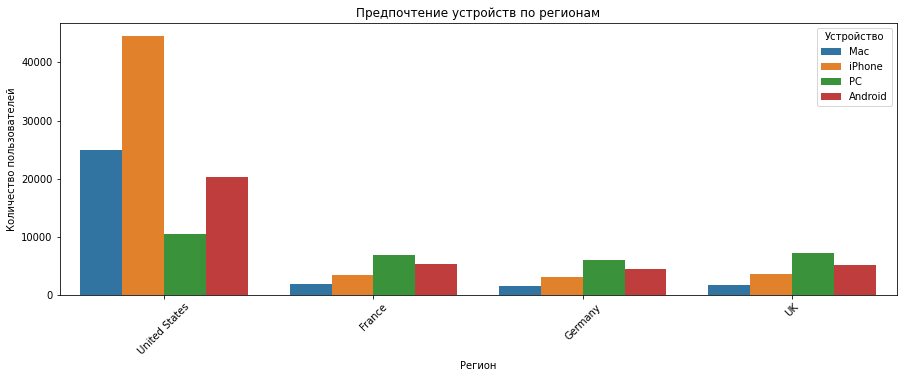

In [35]:
# построение графика
plt.figure(figsize=(15, 5))
sns.countplot(data=profiles, x='region', hue='device')
plt.title('Предпочтение устройств по регионам')
plt.ylabel('Количество пользователей')
plt.xlabel('Регион')
plt.xticks(rotation=45)
plt.legend(title='Устройство')
plt.show()

Похоже, пользователи из США предпочитают IPhone, на втором месте MAC. В Европе предпочтения в девайсах сильно отличаются, там преобладает PC, а на втором месте Андроид. Таким образом, пользователи из США предпочитают использовать мобильные устройства, в то время как европейцам привычнее использовать компьютер для выхода в приложение.


### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [36]:
# общая сумма расходов на рекламу
total_expenses = expenses['costs'].sum()
print(f"Общая сумма расходов на маркетинг: {total_expenses:.2f}")


Общая сумма расходов на маркетинг: 105497.30


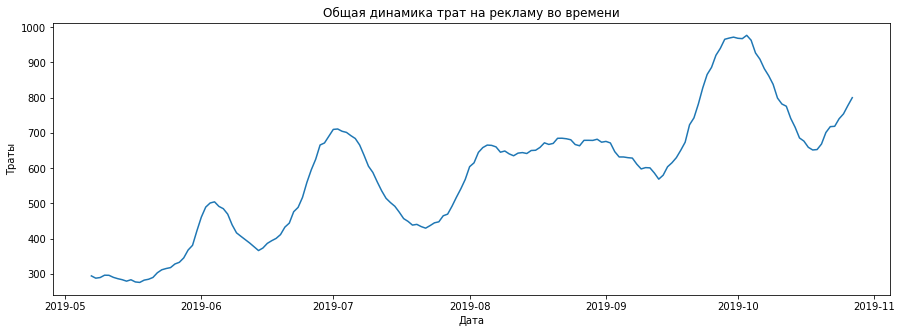

In [37]:
#группировка данных
grouped_costs = expenses.groupby('dt')['costs'].sum()

# сглаживание с помощью скользящего среднего с окном в 7 дней
smoothed_costs = grouped_costs.rolling(window=7).mean()

# Создаем график
plt.figure(figsize=(15, 5))
plt.plot(smoothed_costs.index, smoothed_costs.values)

# заголовок и подписи к осям
plt.title('Общая динамика трат на рекламу во времени')
plt.xlabel('Дата')
plt.ylabel('Траты')

plt.show()

Траты на рекламу за полгода выросли в разы. Посмтрим в разбивке по каналам.

In [38]:
# сводная таблица
channel_expenses = (
    expenses.groupby('channel')['costs'].sum().reset_index()
)

# расчет процентов от общих трат
channel_expenses['percentage'] = (channel_expenses['costs'] / total_expenses * 100).round(2)

# сортировка и отображение
display(channel_expenses.sort_values(by='costs', ascending=False))


channel     costs  percentage
6              TipTop  54751.30       51.90
1            FaceBoom  32445.60       30.75
7      WahooNetBanner   5151.00        4.88
0          AdNonSense   3911.25        3.71
4  OppleCreativeMedia   2151.25        2.04
5      RocketSuperAds   1833.00        1.74
2             LeapBob   1797.60        1.70
9      lambdaMediaAds   1557.60        1.48
3        MediaTornado    954.48        0.90
8             YRabbit    944.22        0.90

Кажется, из всей суммы потраченной на маркетинг больше половины было потрачено только TipTop!

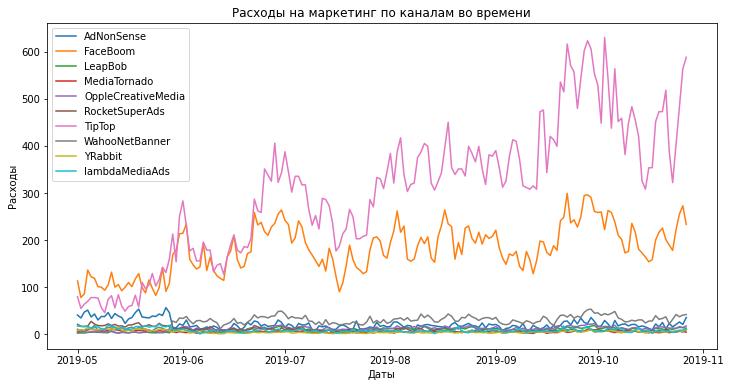

In [39]:
# группировка по дате и каналу, подсчет суммы расходов
expenses_by_channel_date = (
    expenses.groupby(['dt', 'channel']).sum().reset_index()
)

# создание поля
fig, ax = plt.subplots(figsize=(12, 6))

# построение графика для каждого канала
for channel in expenses_by_channel_date['channel'].unique():
    channel_data = expenses_by_channel_date[
        expenses_by_channel_date['channel'] == channel
    ]
    ax.plot(
        channel_data['dt'], 
        channel_data['costs'], 
        label=channel
    )

plt.xlabel('Даты')
plt.ylabel('Расходы')
plt.title('Расходы на маркетинг по каналам во времени')
plt.legend()
plt.show()

In [40]:
# меняем тип на datetime
expenses['dt'] = pd.to_datetime(expenses['dt'])

# добавить столбцы 'month' и 'week'
expenses['month'] = expenses['dt'].dt.month
expenses['week'] = expenses['dt'].dt.isocalendar().week

In [41]:
expenses.head()

dt   channel  costs  month  week
0 2019-05-01  FaceBoom  113.3      5    18
1 2019-05-02  FaceBoom   78.1      5    18
2 2019-05-03  FaceBoom   85.8      5    18
3 2019-05-04  FaceBoom  136.4      5    18
4 2019-05-05  FaceBoom  122.1      5    18

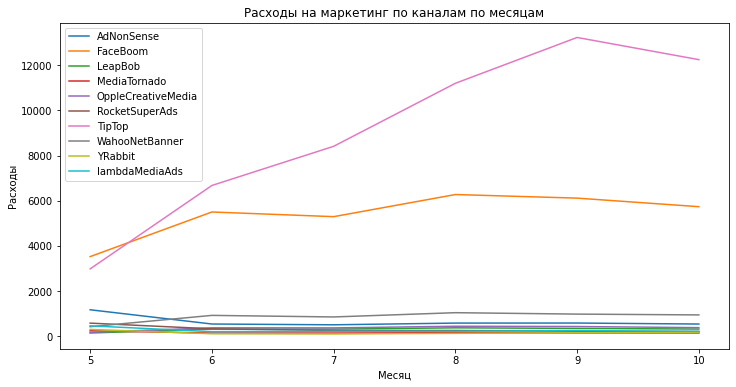

In [42]:
# группировка по дате и каналу, подсчет суммы расходов
expenses_by_channel_date = (
    expenses.groupby(['month', 'channel']).sum().reset_index()
)

# создание поля
fig, ax = plt.subplots(figsize=(12, 6))

# построение графика для каждого канала
for channel in expenses_by_channel_date['channel'].unique():
    channel_data = expenses_by_channel_date[
        expenses_by_channel_date['channel'] == channel
    ]
    ax.plot(
        channel_data['month'], 
        channel_data['costs'], 
        label=channel
    )

plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.title('Расходы на маркетинг по каналам по месяцам')
plt.legend()
plt.show()

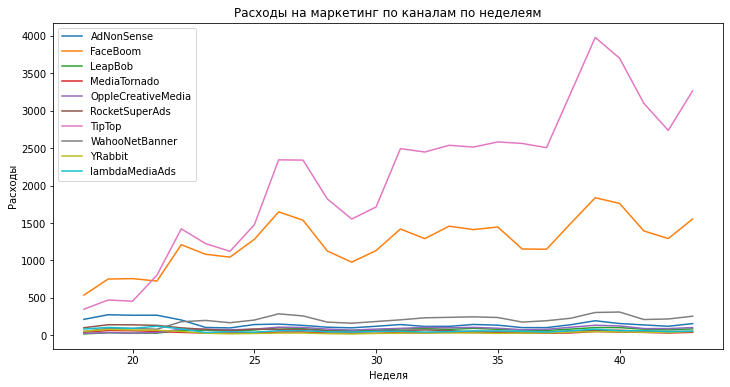

In [43]:
# группировка по дате и каналу, подсчет суммы расходов
expenses_by_channel_date = (
    expenses.groupby(['week', 'channel']).sum().reset_index()
)

# создание поля
fig, ax = plt.subplots(figsize=(12, 6))

# построение графика для каждого канала
for channel in expenses_by_channel_date['channel'].unique():
    channel_data = expenses_by_channel_date[
        expenses_by_channel_date['channel'] == channel
    ]
    ax.plot(
        channel_data['week'], 
        channel_data['costs'], 
        label=channel
    )

plt.xlabel('Неделя')
plt.ylabel('Расходы')
plt.title('Расходы на маркетинг по каналам по неделеям')
plt.legend()
plt.show()

Новые графики еще более наглядно демонстрируют, что траты на рекламу не выросли равномерно по всем каналам, лишь TipTop и FaceBoom стали получить в разы больше денег

In [44]:
# меняем тип на дату
expenses['dt'] = pd.to_datetime(expenses['dt']).dt.date

# добавим в профили столбец с суммой затрат на привлечение каждого клиента
profiles2 = get_profiles4(visits, orders, [], expenses)
display(profiles2.head())

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

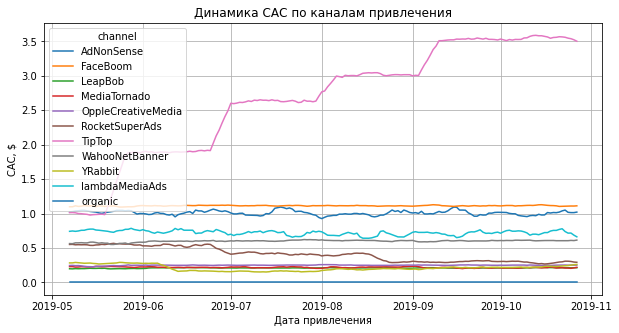

In [45]:
# Создание сводной таблицы
pivot_data = profiles2.pivot_table(
    index='dt', columns='channel',
    values='acquisition_cost', 
    aggfunc='mean'
)

# Применение функции filter_data с желаемым размером окна,
# опытным путем получилось 7
smoothed_data = filter_data(pivot_data, window=7)

# Построение графика сглаженных данных
smoothed_data.plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()


In [46]:
# Создание сводной таблицы
pivot_data = profiles2.pivot_table(
    index='month', columns='channel',
    values='acquisition_cost', 
    aggfunc='mean'
)

# удалим столбец с органик, там нули
pivot_data = pivot_data.drop('organic', axis=1)

display(pivot_data)

channel     AdNonSense  FaceBoom   LeapBob  MediaTornado  OppleCreativeMedia  \
month                                                                          
2019-05-01    1.027856  1.105868  0.201842      0.226768            0.243544   
2019-06-01    1.012500  1.116748  0.211696      0.218354            0.249831   
2019-07-01    0.992126  1.113652  0.209859      0.215365            0.251544   
2019-08-01    0.995876  1.112088  0.210478      0.224325            0.250142   
2019-09-01    1.004663  1.114434  0.210385      0.210962            0.250586   
2019-10-01    0.993715  1.114316  0.212261      0.211722            0.250829   

channel     RocketSuperAds    TipTop  WahooNetBanner   YRabbit  lambdaMediaAds  
month                                                                           
2019-05-01        0.549411  1.357468        0.577655  0.281144        0.753947  
2019-06-01        0.498798  2.077684        0.598441  0.182788        0.732353  
2019-07-01        0.417334  2.650552        0.607709  0.161493        0.721053  
2019-08-01        0.354000  3.011290        0.605941  0.191908        0.694006  
2019-09-01        0.302493  3.480405        0.601477  0.213992        0.714451  
2019-10-01        0.293056  3.543535        0.609314  0.234112        0.707285

Кажется клиенты привлеченные из TipTop обходятся все дороже и дороже. Посчитаем во сколько обходятся остальные пользователи без  TipTop.

In [47]:
# удалим TipTop из рассмотрения
pivot_data = pivot_data.drop('TipTop', axis=1)

In [48]:
# Считаем среднюю стоимость привлечения по каждому месяцу
average_cost_per_month = pivot_data.mean(axis=1)

display(average_cost_per_month)

# среднее для всех месяцев
average_cost_overall = pivot_data.values.mean()

print(f'Cредняя стоимость привлечения пользователей за все время: {average_cost_overall:.2f}')


month
2019-05-01    0.552004
2019-06-01    0.535723
2019-07-01    0.521126
2019-08-01    0.515418
2019-09-01    0.513716
2019-10-01    0.514068
dtype: float64

Cредняя стоимость привлечения пользователей за все время: 0.53


Средняя стоимоть привлечения пользователей в других каналах кроме TipTop 0.5 у.е.

**Подвывод** Общая сумма расходов на рекламу составляет 105497 у.е., при этом два канала получили большую часть этих стредств. Реклама в TipTop обошлась в	54751 у.е. а реклама в FaceBoom	32445 у.е., причем динамика расходов показывает, что примерно с июня расходы на рекламу в этих двух источниках росли каждый месяц. С ростом затрат на рекламу выросла стоимость привлечения одного клиента, и в канале TipTop расходы на привлечение одного клиента составляют 3.5. у.е. в то время как в остальных каналах стоимость привлечения около 0.5 у.е.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### Анализ окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [49]:
# оставляем только те данные где канал не органик
profiles2 = profiles2[profiles2['channel'] != 'organic']

In [50]:
# Подсчет LTV и ROI c помощью ранее объявленых функций
from datetime import datetime, timedelta
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles2, orders, datetime(2019, 11, 1).date(), 14
)

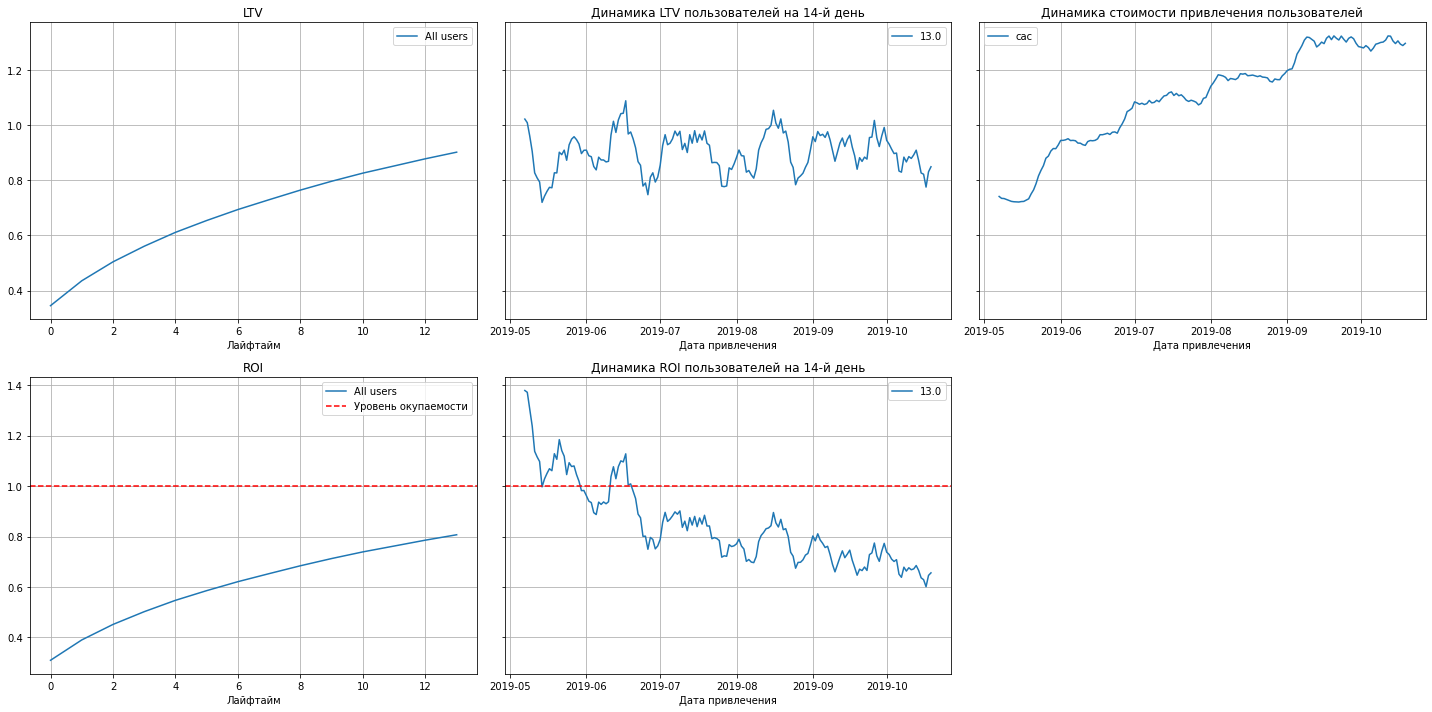

In [51]:
# построение графиков LTV и ROI
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

Динамика стоимости привлеченных пользователей показывает, что пользователи становятся дороже.ROI показывает, что реклама не окупается, даже через две недели. Динамика Roi на 14 день стала падать, после июня - июля 2019 года, и компания стала уходить в минус. Можно посмотреть на ROI поближе, и захотелось взять чуть больше горизонт, чтобы понять - хоть на каком то промежутке времени есть окупаемость?

In [52]:
# Подсчет LTV и ROI c помощью ранее объявленых функций с горизонтом 30 дней
from datetime import datetime, timedelta
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles2, orders, datetime(2019, 11, 1).date(), 30
)

In [53]:
# исключение размеры когорт и CAC из таблицы ROI
report = roi.drop(columns=['cohort_size', 'cac'])

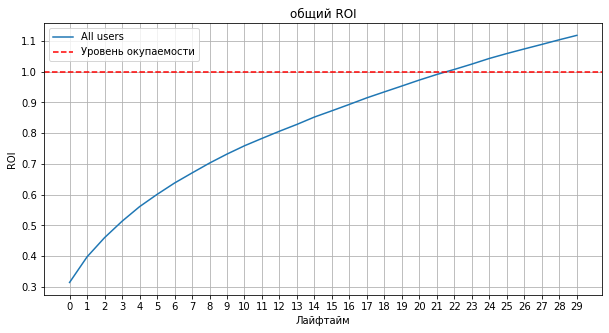

In [54]:
# строим кривые ROI
report.T.plot(grid=True, 
              figsize=(10, 5), 
              xticks=list(report.columns.values))
plt.title('общий ROI')
plt.ylabel('ROI')
plt.xlabel('Лайфтайм')
plt.axhline(y=1, color='red',
            linestyle='--',
            label='Уровень окупаемости')
plt.legend()
plt.show()

Оказалось на 21 день все таки затраты окупаются! Посмотрим динамику LTV на 1,14, и 21 день.

/tmp/ipykernel_432/2130788200.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].rolling(window).mean()


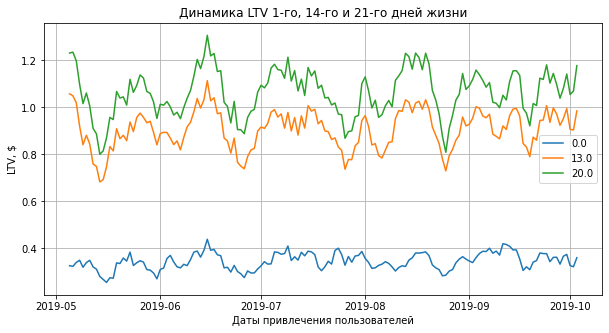

In [55]:
# делаем срез данных
report = ltv_history[[0, 13, 20]]  

# применяем функцию фильтрации с выбранным размером окна
filtered_report = filter_data(report, window=5)


# строим график динамики LTV
filtered_report.plot(grid=True, figsize=(10, 5))
plt.title('Динамика LTV 1-го, 14-го и 21-го дней жизни')
plt.ylabel('LTV, $')
plt.xlabel('Даты привлечения пользователей')
plt.show()


Если я правильно понимаю, монетизация пользователей повысилась после июня 2019 года, что в принципе хорошо. 
Так же я вижу что прирост между 14 днем и 21 очень слабый.

**Подвывод:**  Из графиков видно, что даже за две недели клиенты не окупаются, а только через 21 день.  Но так было не всегда, окупаемость пользователей резко снизилась после июня 2019 года, при том что  динамика стоимости привлечения растет.

#### Анализ конверсии и удержания

##### Удержание

In [56]:
# оставляем только те данные где канал не органик
profiles = profiles[profiles['channel'] != 'organic']

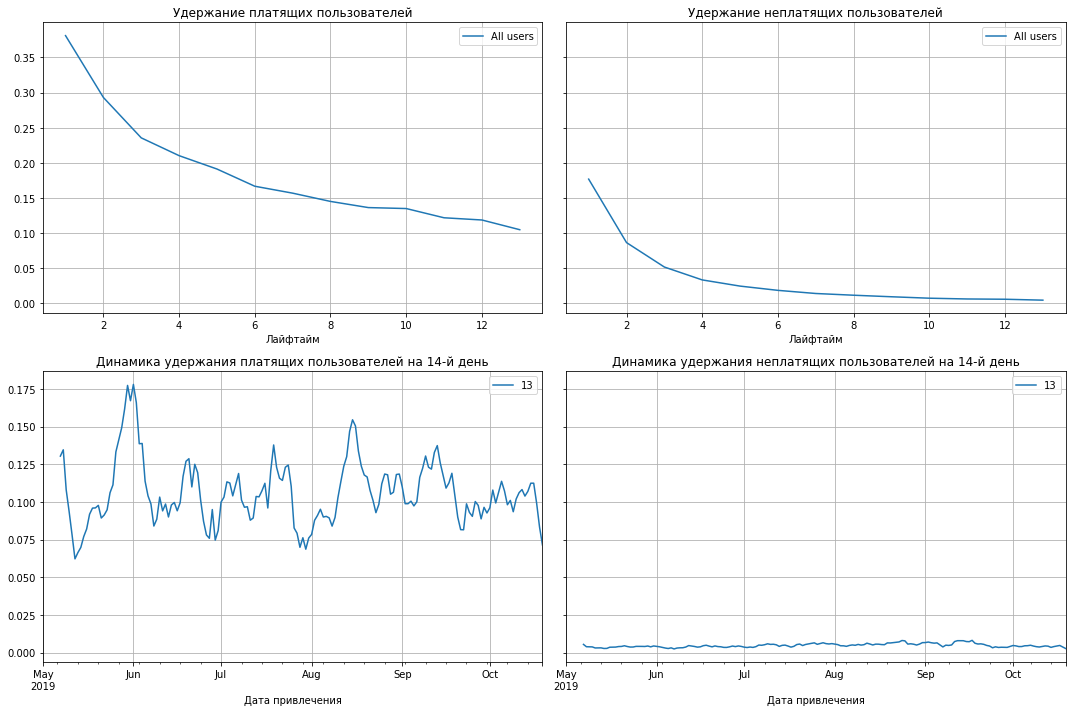

In [57]:
# получение данных об удержании с помощью ранее объявленных функций
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, datetime(2019, 11, 1).date(), 14
)

# построение графиков
plot_retention(retention_grouped, retention_history, 14)

Удержание пользователей стабильно плохое. Не платящие пользователи удерживаются совсем плохо, не больше 4-5 дней. Построим с разбивкой по каналам.

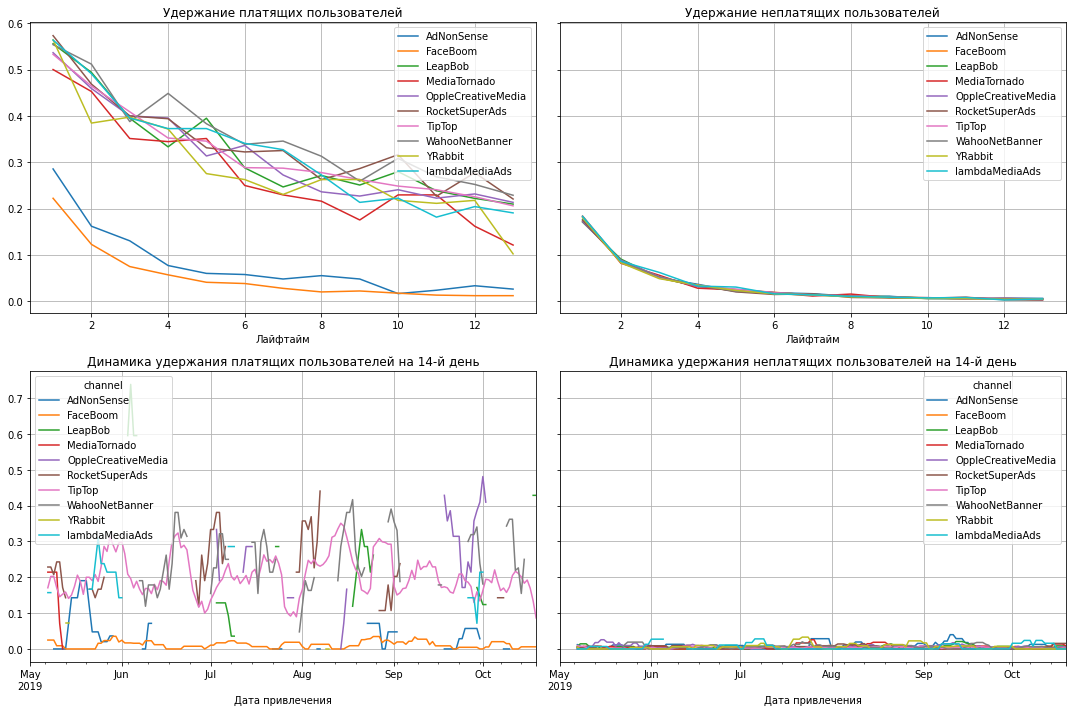

In [58]:
# получение данных об удержании с разбивкой по каналам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, datetime(2019, 11, 1).date(), 14,
    dimensions= ['channel']
)

# построение графиков
plot_retention(retention_grouped, retention_history, 14)

Не платящие пользователи удерживаются плохо во всех каналах, однако, платящие хуже удерживаются в двух каналах. Посмотрим поближе.  

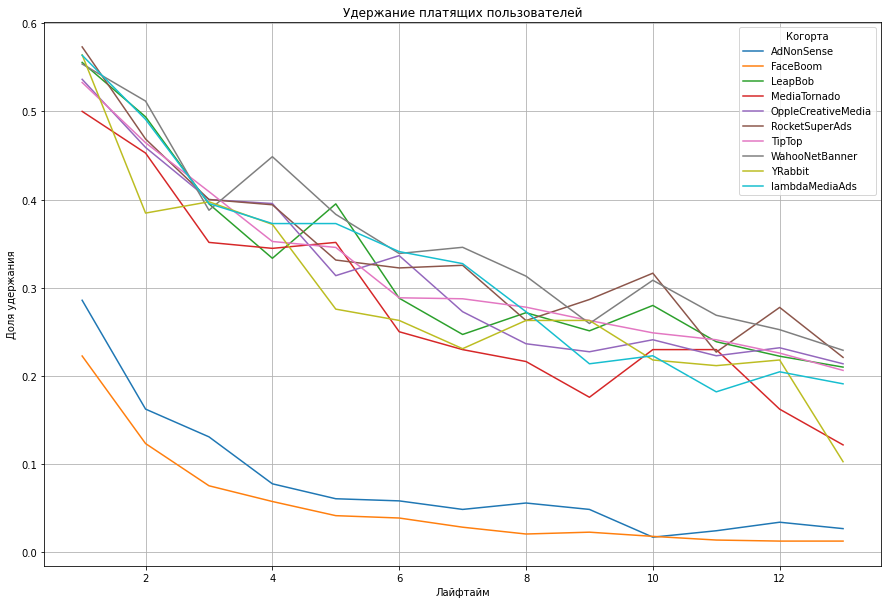

In [59]:
# Отфильтровываем данные для платящих пользователей
retention_for_payers = (
    retention_grouped.query('payer == True').droplevel('payer')
)

# Исключаем размеры когорт и удержания первого дня
retention_for_payers = (
    retention_for_payers.drop(columns=['cohort_size', 0])
)

# Построение графика

retention_for_payers.T.plot(grid=True, figsize=(15, 10))
plt.legend(title='Когорта')
plt.xlabel('Лайфтайм')
plt.ylabel('Доля удержания')
plt.title('Удержание платящих пользователей')
plt.show()


У нас два аутсайдера, FaceBoom и AdNonSense. Хочу убедиться что не перепутала цвета линий, построю график только трех каналов 'AdNonSense', 'FaceBoom','OppleCreativeMedia'

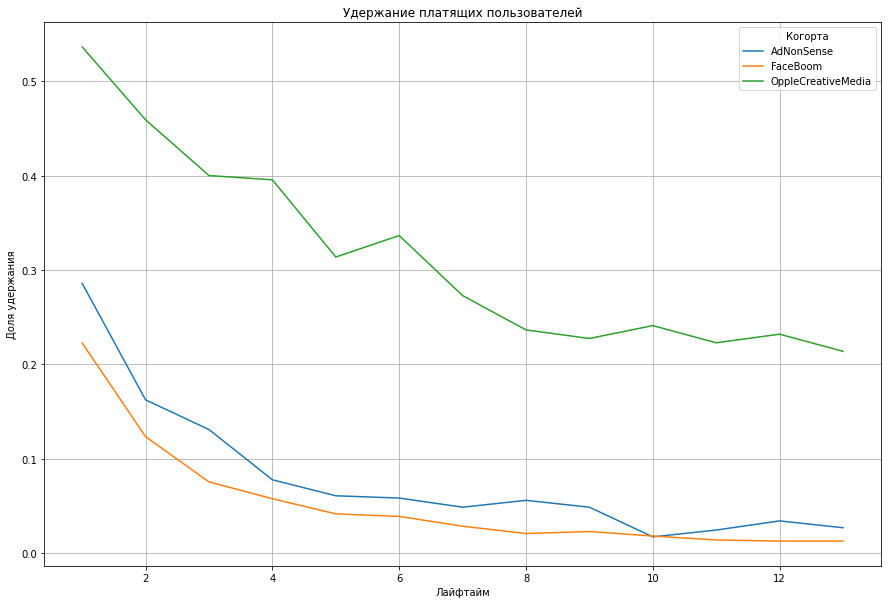

In [60]:
# делаем срез и отбираем только три канала
selected_channels_data =( retention_for_payers
.loc[['AdNonSense', 'FaceBoom','OppleCreativeMedia']])

# Построение графика

selected_channels_data.T.plot(grid=True, figsize=(15, 10))
plt.legend(title='Когорта')
plt.xlabel('Лайфтайм')
plt.ylabel('Доля удержания')
plt.title('Удержание платящих пользователей')
plt.show()

**Подвывод:** Удержание в каналах 'AdNonSense'и 'FaceBoom' ниже процентов на 25-30 по сравнению с остальными каналами среди платящих пользователей. Удержание неплатящих стабильно низкое. Хотя 'OppleCreativeMedia' получила 2 процента всех инвестиций в рекламу, а 'FaceBoom' 30 процентов.


##### Конверсия

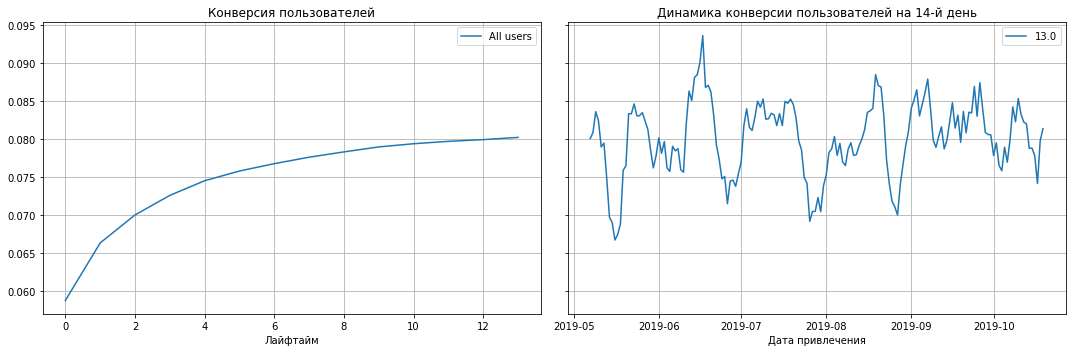

In [61]:
# получение конверсии
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14
)

# построение графиков
plot_conversion(conversion_grouped, conversion_history, 14) 

Конверсия достаточно низкая, примерно 8 процентов достигает в течение 14 дней. По динамике видно конверсия стала лучше после июня 2019 года. Посмотрим на эти метрики с разбивкой по каналам.

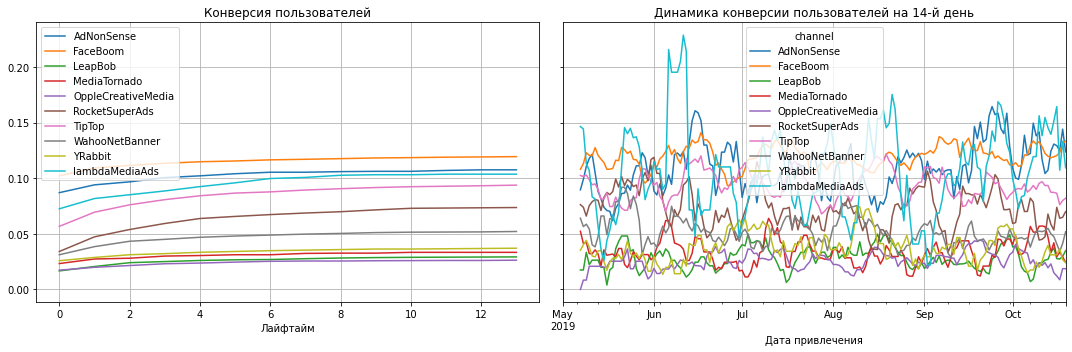

In [62]:
# получение конверсии с разбивкой по каналам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, 
    dimensions= ['channel']
)

# построение графиков
plot_conversion(conversion_grouped, conversion_history, 14)

**Подвывод**   Конверсия по всем каналам относительно постоянная, неплохую конверсию демонстрирует AdNonSense и FaceBoom. 

#### Анализ окупаемости рекламы с разбивкой по устройствам

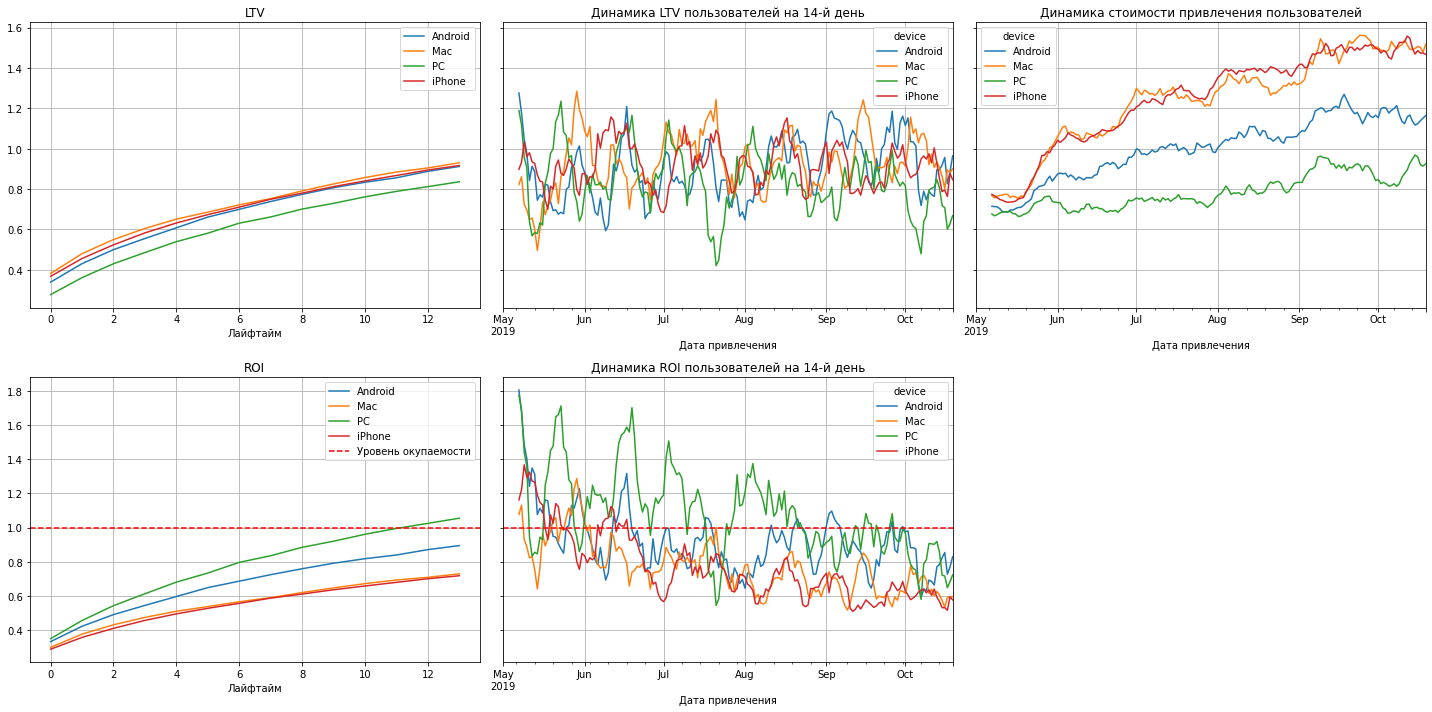

In [63]:
# получение LTV и ROI  с разбивкой по устройствам
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles2, orders, datetime(2019, 11, 1).date(), 14,
    dimensions = ['device']
)

# построение графиков
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

Динамика привлечения повысилась с июня 2019 года для пользователей всех видов устройств, но у пользователей Mac и iPhone чуть лучше. В тоже время динамика Roi показывает, что окупаемость постепенно падала весь период, но у пользователей PC удалось окупиться на 11 день, а у других каналов не вышло за две недели.

#### Анализ окупаемости рекламы с разбивкой по странам

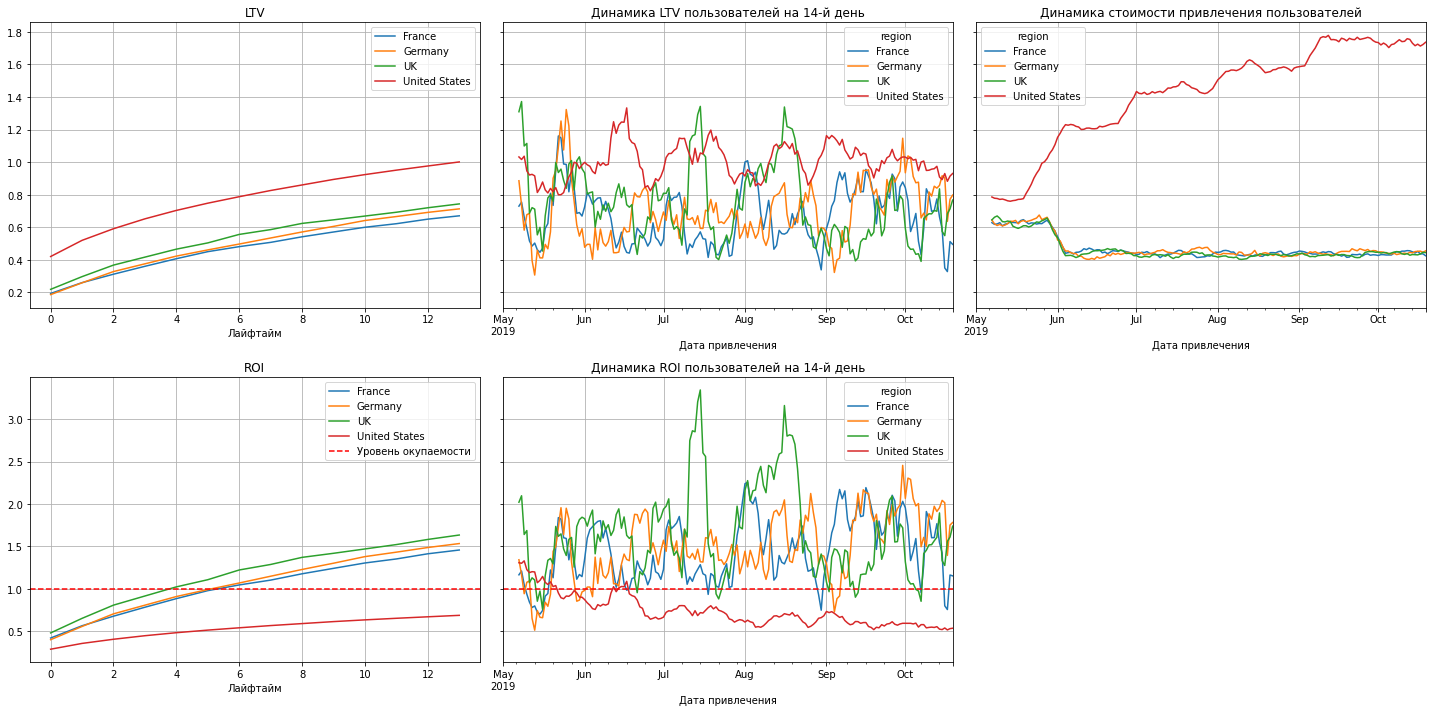

In [64]:
# получение LTV и ROI  с разбивкой по странам
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles2, orders, datetime(2019, 11, 1).date(), 14, 
    dimensions = ['region']
)

# построение графика
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

Бросается в глаза график динамика привлечения пользователей, где резкий рост стоимости привлечения в США c июня 2019 года. Одновременно с этим, окупаемость там самая низкая согласно ROI. Реклама окупилась везде, кроме США. Тоже показывает и динамика ROI 14 дня, где США также стало приносить лишь убыток с июня 2019 года.

#### Анализ окупаемость рекламы с разбивкой по рекламным каналам

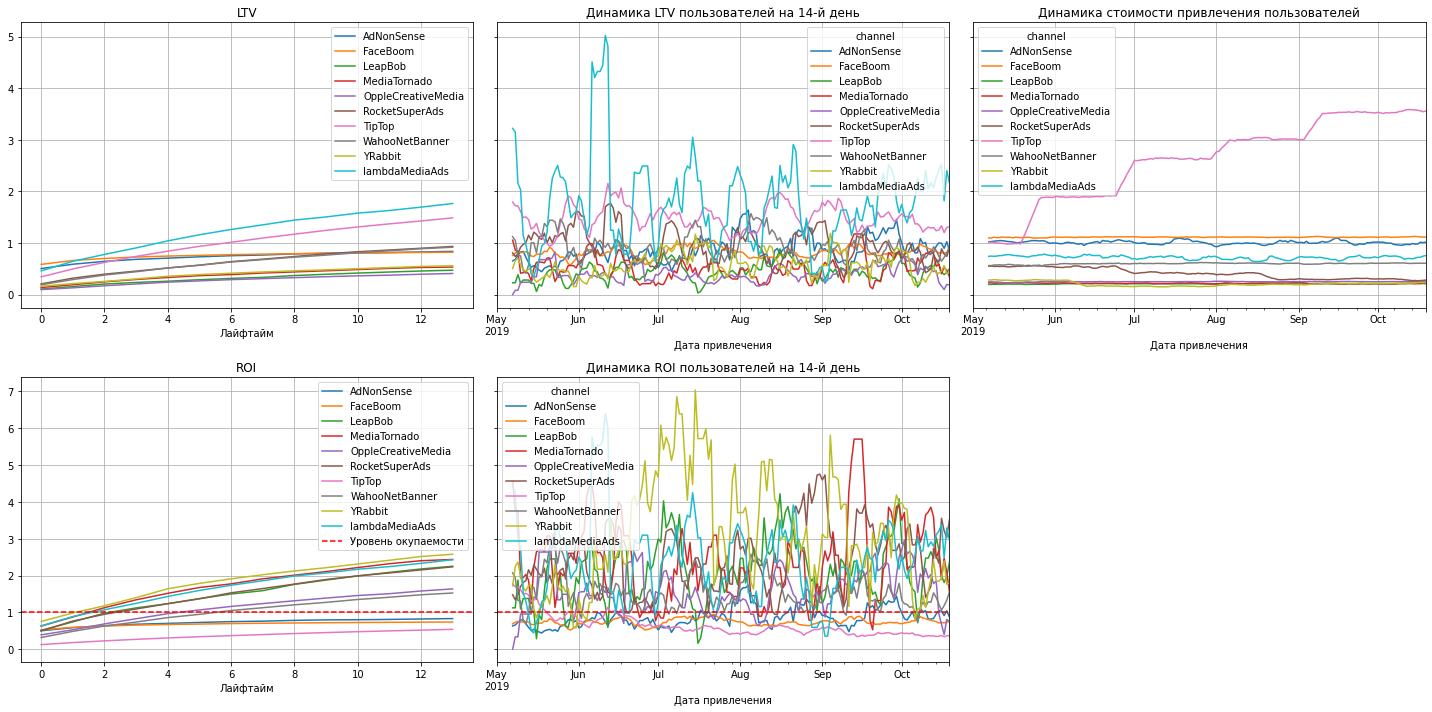

In [65]:
# получение LTV и ROI  с разбивкой по каналам
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles2, orders, datetime(2019, 11, 1).date(), 14, 
    dimensions = ['channel']
)

# построение графика
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

Стоимость привлечения у Tip Top сильно отличается от остальных каналов, растет с июня 2019 года. Несколько каналов не показывают окупаемости. Посмотрим поближе какие.

In [66]:
# исключаем из таблицы размеры когорт и cac
roi = roi.drop(columns=['cohort_size', 'cac'])

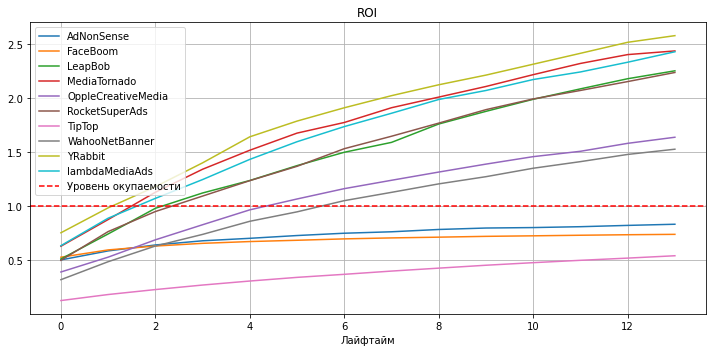

In [67]:
# Отрисовываем график ROI
roi.T.plot(grid=True, figsize=(10, 5))
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.xlabel('Лайфтайм')
plt.title('ROI')

plt.tight_layout()
plt.show()


Три канала привлечения не выходят на уровень окупаемости: AdNonSense, Faceboom, и ниже всех TipTop. 

**Подвывод**  На первом месте по окупаемости YRabbit, MediaTornado,LambdaMediaAds, RocketSuperAds и LeapBob. Эти пять каналов окупаются бувално за 2-3 дня. Хорошими примерами окупаемости служат каналы WahooNetBaner и OppleCreativeMedia, они окупаются примерно на пятый день. Но у нас есть три аутсайдера, где реклама не окупилась.
Резко нарастив стоимость привлечения пользователей в канале TipTop рекалама перестала окупаться. Кроме TipTop реклама не окупается в AdNonSense, Faceboom.

#### Анализ окупаемости в разрезе Европа - Америка

In [68]:
# вспомним как выглядит profiles2. Органику уже выкинули на предыдущем этапе.
profiles2.head()

user_id            first_ts     channel   device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom      Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom   iPhone  United States   
3  22593348 2019-08-22 21:35:48  AdNonSense       PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit   iPhone  United States   
7  46006712 2019-06-30 03:46:29  AdNonSense  Android         France   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769  
7  2019-06-30 2019-06-01   True          1.008000

In [69]:
# получаем два набора данных: для США и без США, тоесть для Европы
us_data_profiles = profiles2.query("region == 'United States'")
euro_data_profiles = profiles2.query("region != 'United States'")


##### Анализ показателей в разрезе США - Европа  по каналам.

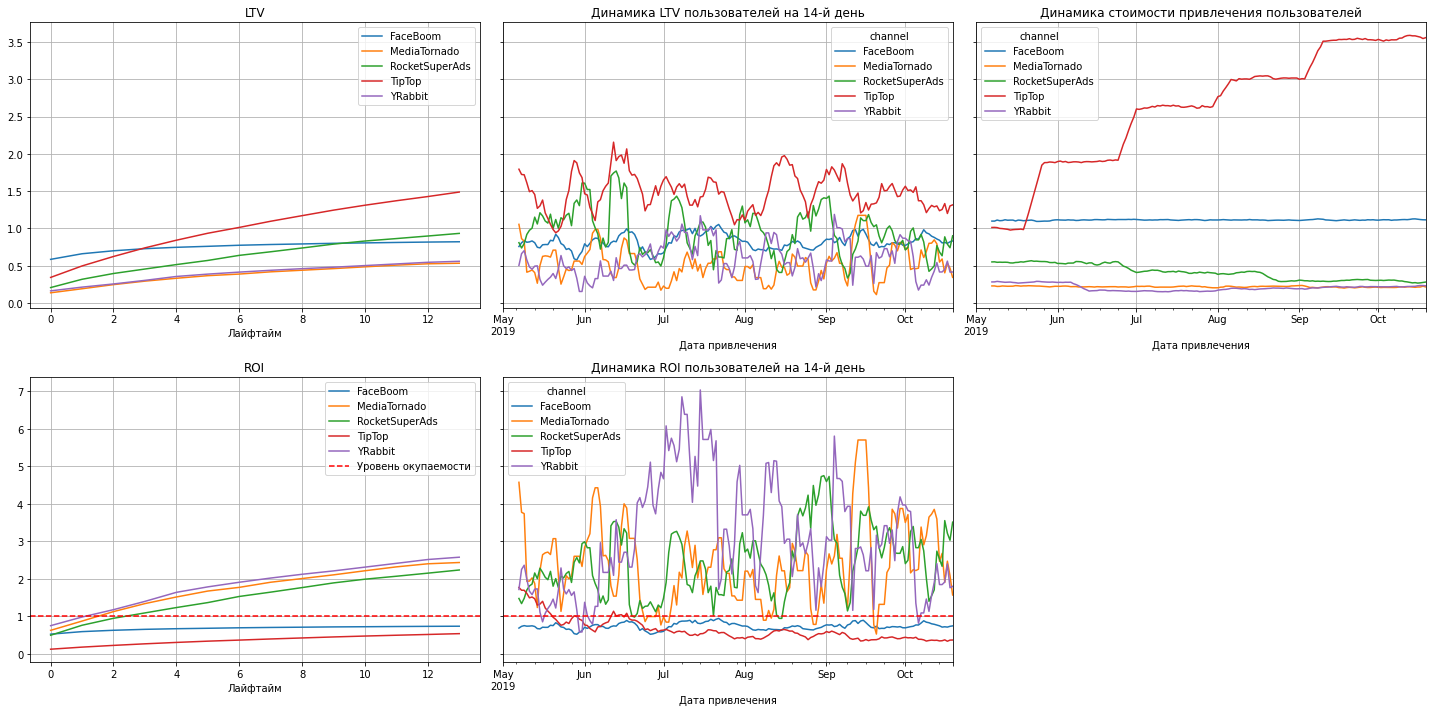

In [70]:
# получение LTV и ROI  в разбивке по каналам ТОЛЬКО для США
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    us_data_profiles, orders, datetime(2019, 11, 1).date(), 14, 
    dimensions = ['channel']
)

# построение графика
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

Кажется непомерно расли траты на TipTop именно в США. Вместе с FaceBoom согласно ROI эти два канала не выходят на окупаемость в Штатах. В свою очередь MediaTornado, RocketSuperAds и YRabbit вышли на окупаемость на третий день. Посмотрим на показатели в Европе.

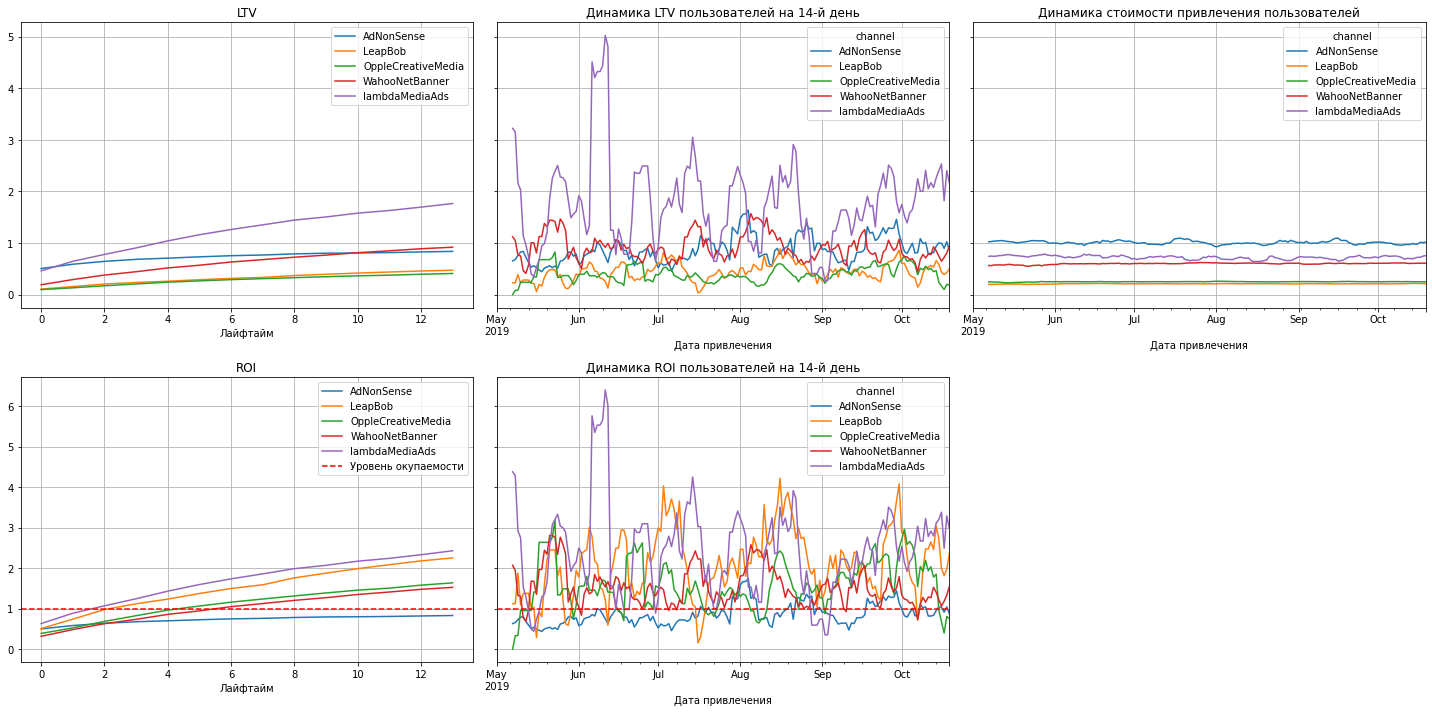

In [71]:
# получение LTV и ROI ТОЛЬКО для Европы 
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    euro_data_profiles, orders, datetime(2019, 11, 1).date(), 14, 
    dimensions = ['channel']
)

# построение графика
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

В Европе по каналам все более-менее стабильно. Стоимость привлечения достаточно низкая, а ROI сообщает, что не окупается только AdNonSense. Все хорошо с привлеченим в каналах LambdaMediaAds, RocketSuperAds и LeapBob. Чуть хуже у  WahooNetBaner и OppleCreativeMedia 

##### Анализ в разрезе США-Европа по устройствам

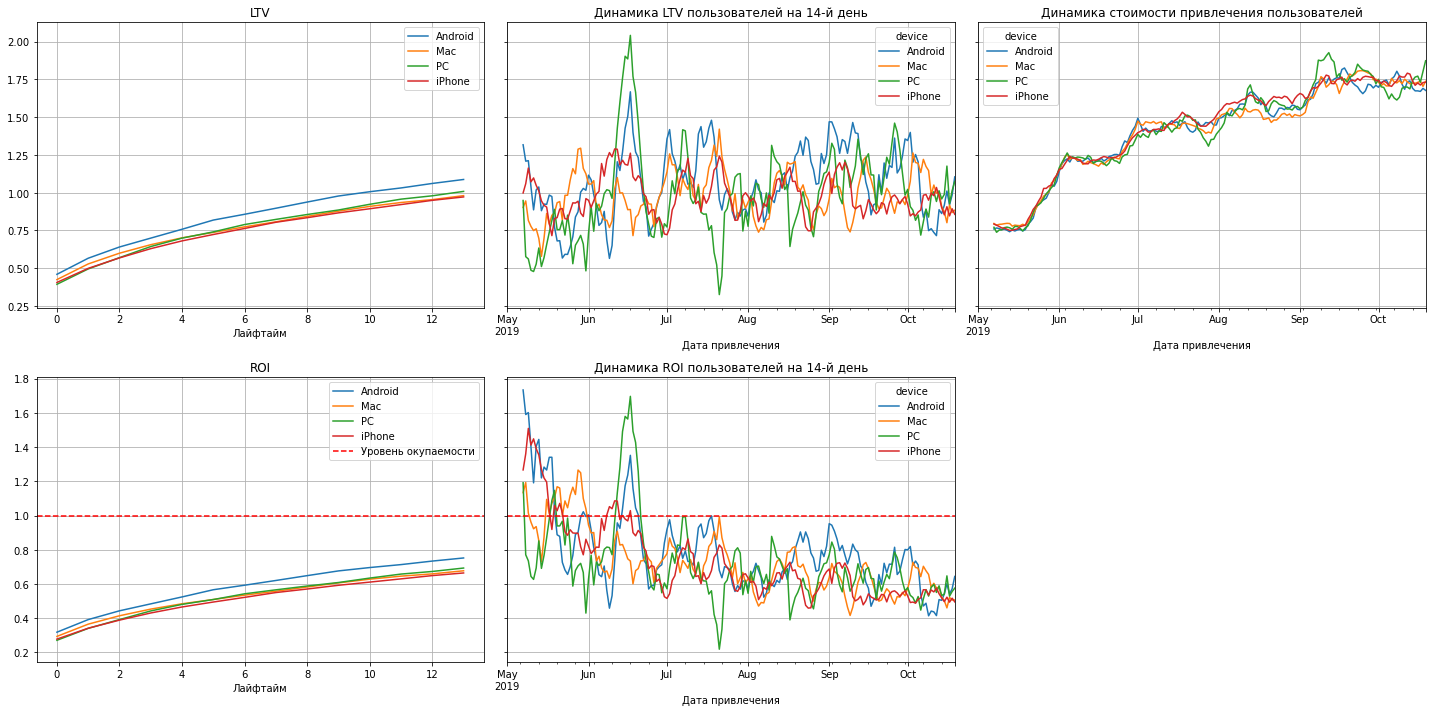

In [72]:
# получение LTV и ROI ТОЛЬКО для США 
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    us_data_profiles, orders, datetime(2019, 11, 1).date(), 14, 
    dimensions = ['device']
)

# построение графика
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

В США все устройства не окупаются, стоимость пользователей привлечения растет (теперь то мы знаем, почему так, TipTop тянет всех на дно.)

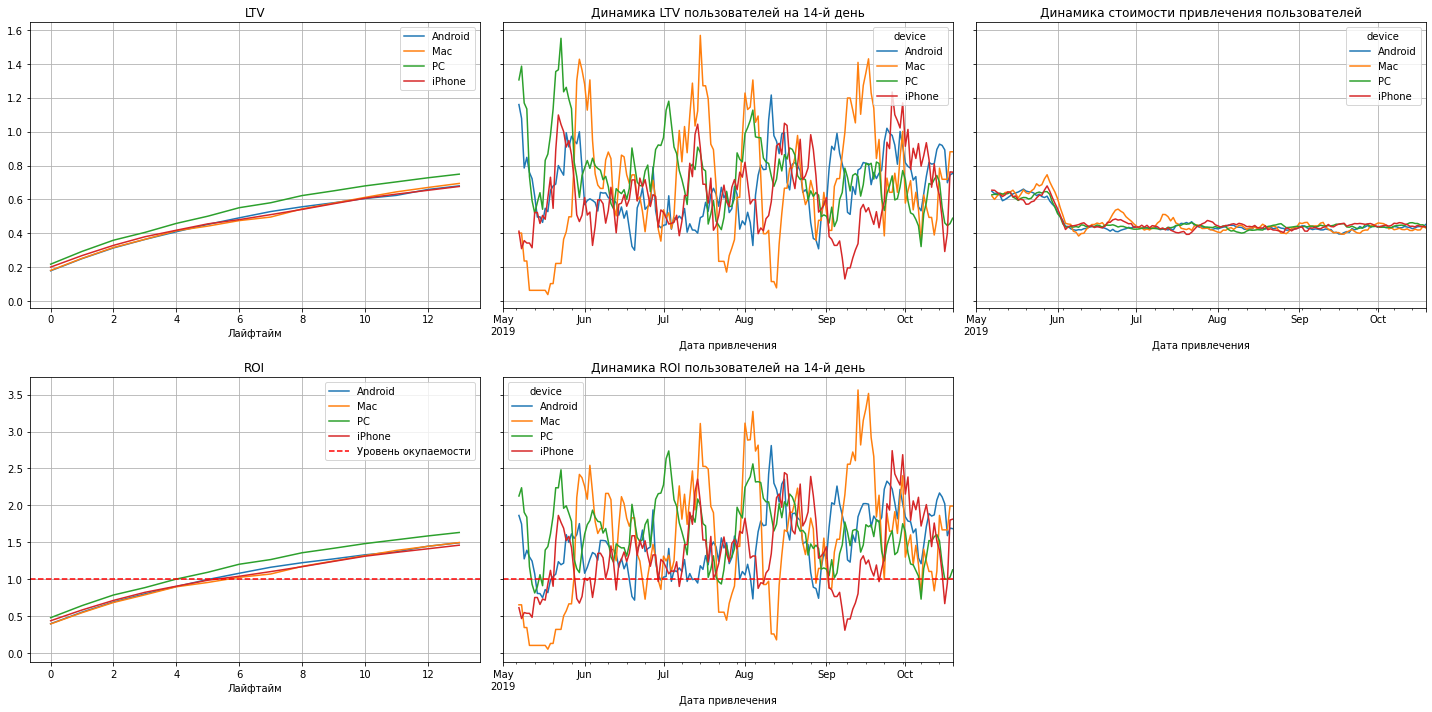

In [73]:
# получение LTV и ROI ТОЛЬКО для Европы 
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    euro_data_profiles, orders, datetime(2019, 11, 1).date(), 14, 
    dimensions = ['device']
)

# построение графика
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

В Европе с показателями по устройствам все хорошо, стоимость привлечения даже унизилась, а окупаемость у всех устройств на 6 день примерно. 

**Подвывод** Из-за высоких трат в США не окупается канал TipTop, он тянет показатели по всем устройствам в область не окупаемости. В Европе все вполне хорошо, исключение составляет канал привлечения AdNonSense, который не выходит на окупаемость даже за две недели.

#### Анализ без лидеров CAC

Если я правильно понимаю, нужно выкинуть канал TipTop, из-за завышенного СAC

In [74]:
# фильтруем профили, выбираем все кроме TipTop
profiles_wo_tiptop = profiles2.query("channel != 'TipTop'")

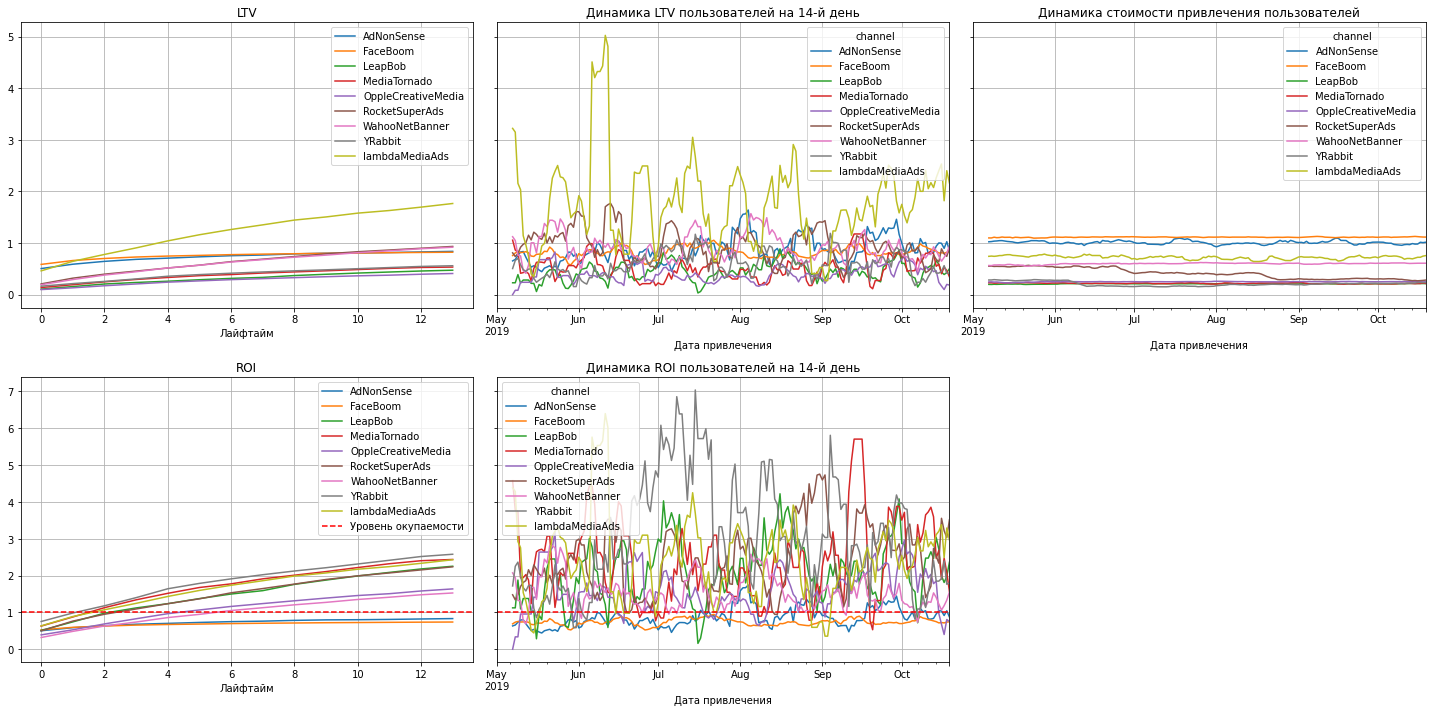

In [75]:
# получение LTV и ROI  с разбивкой по каналам для всех кроме TipTop
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_wo_tiptop, orders, datetime(2019, 11, 1).date(), 14, 
    dimensions = ['channel']
)

# построение графика
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

**ВЫВОД**

После проведения анализа данных приложения Procrastinate Pro+ за полгода (с мая по конец октября 2019 г.) нам удалось выяснить основные причины снижения выручки. 
Выводы в соответствии с поставленными задачами:

1. Профиль пользователя и покупятеля
- Мы видим, что больше всего пользователей из США, там же самый большой процент покупателей.

- Чаще всего пользователи заходят в приложение через iPhone, меньше через Android, и почти в два раза меньше пользователей используют Mac и PC. У пользователей Мac и iPhone процент покупателей чуть выше чем у пользователей Android и PC.

- Больше всего пользователей категории "organic" (не из рекламных источников), но у них низкий процент покупателей, всего 2 процента. Самым эффективным источником оказался FaceBoom, также среди них самый высокий процент покупателей, чуть больше 12 процентов. Вторым по эффективности привлечения идет TipTop при этом процент покупателей составляет 9.6 процентов. Остальные источники имеют 2-10 процентов покупателей. 

2. Расходы на маркетинг

Общие расходы на рекламу - 105497 у.е. Большая часть средств ушла на TipTop (54751 у.е.) и FaceBoom (32445 у.е.). С июня расходы на эти каналы увеличивались. Стоимость привлечения клиента в TipTop выросла до 3.5 у.е., в то время как в других каналах - около 0.5 у.е.

3. Анализ конверсии и удержания пользователей.

 Удержание в каналах AdNonSense и FaceBoom ниже процентов на 25-30 по сравнению с остальными каналами среди платящих пользователей. Удержание неплатящих стабильно низкое.
 
Конверсия по всем каналам относительно постоянная, лидеров нет, но AdNonSense и FaceBoom конверсия чуть лучше чем у остальных.

4. Окупаемость рекламы

В целом реклама не окупилась, согласно ROI даже за две недели не удается окупиться. Увеличив расходы на меркетинг в каналах  TipTop Faceboom резко увеличилась CAC (стоимость привлеения пользователя) в канале TipTop и рекалама перестала окупаться. Из-за высоких трат в США не окупается канал TipTop, он тянет показатели по всем устройствам в область не окупаемости. В Европе все вполне хорошо, исключение составляет канал привлечения AdNonSense, который не выходит на окупаемость.

5. Рекомендации маркетологам.

При изучении затрат и окупаемости по странам, устройствам и рекламным каналам стало ясно, что основной проблемой являются чрезмерные затраты на привлечение. Стоит значительно уменьшить затраты на привлечение пользователей из США и инвестиции в канал TipTop, так как эти траты оказались неоправданно высоки. В Европе не окупился AdNonSense, от него советую отказаться. Освободившиеся ресурсы стоит распределить по слегка отстающим, но прибыльным каналам в Европе WahooNetBaner и OppleCreativeMedia, а в США это MediaTornado, RocketSuperAds и YRabbit.
